# Visualize Convergence

This notebook is used to visualize results produced by `runConvergenceRange.py`. Graphs produced by this notebook can be used to determine the convergence of word2vec models trained on diachronic corpus, in order to determine the number of years required for the model to be representative of the corpus. For mor information, read the README.md document.

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle as pkl
from glob import glob

In [3]:
from helpers import getYears
from convergence import computeConvergenceOverYearRange

Using data from : /data2/times/times/
Using cache from: /data3/times/times_cache/


# IMPORTANT
Set `saveDir` to be the directory where you saved your convergence results. This should be the same which was used as the `--outDir` of `runConvergenceRange.py` script.

In [4]:
saveDir = ''

In [4]:
def doPlots(convergence, sentenceYearCounter):
    semilogx(convergence.keys(), convergence.values(), 'x-')
    xlabel('# Sentences')
    ylabel('Convergence')
    for year,sentenceCount in sentenceYearCounter.iteritems():
        plot([sentenceCount,sentenceCount], [0,1],'--', color='#aaaaaa')
        text(sentenceCount, 0.5, str(year), rotation=270)
    ax = axis()
    axis([ ax[0], ax[1], 0.0, 1.0 ])


In [5]:
def plotSentences(sentenceYearCounter):
    semilogy(sentenceYearCounter.keys(), sentenceYearCounter.values(), 'x-')
    xticks(sentenceYearCounter.keys(), sentenceYearCounter.keys(), rotation=90)
    xlabel('Year')
    ylabel('# Sentences')

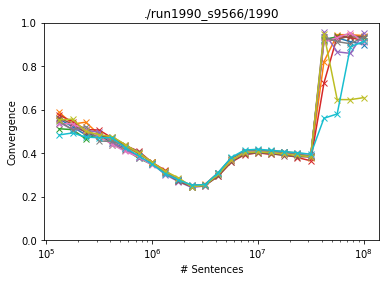

In [9]:
# files = sorted(glob(saveDir + '/convergenceRange_*.pkl'))
files = sorted(glob('./run1990_s*' + '/convergenceRange_*.pkl'))

for f in files:
    convergence, sentenceYearCounter, vocabSize = pkl.load(open(f, 'rb'))
    # plotTitle = f.replace(saveDir + '/convergenceRange_', '').replace('.pkl', '')
    plotTitle = f.replace('convergenceRange_', '').replace('.pkl', '')
    
    # figure(figsize=(12,4))
    # subplot(1,2,1)
    doPlots(convergence, sentenceYearCounter)
    title(plotTitle)
    
    # subplot(1,2,2)
    # plotSentences(sentenceYearCounter)

# Checking diagonal convergence
Just for argument sake -- I had a look at one set of models, to see how the diagonal values behave (I should probably check for all sets of models, but one will do).

Initially model changes a lot, then it settles and then converges (like before).

The mean of the digagonal convergence is equivalent to the convergence above.

Next steps:

 - Not sure ?
 - Produce graphs from upstairs
 - Adjust text and send round again
 

In [10]:
from convergence import measureDiagonalConvergence, getModelInv
from sortedcontainers import SortedDict
import gensim

In [11]:
modelFolder = './run1990_s1261/'

files = sorted(glob(modelFolder + '/*[!vocab].w2v'))
convergence = SortedDict()
sentenceYearCounter = SortedDict()
vocabSize = SortedDict()

oldModel, oldModelInv = None, None
for f in files:
    print '... loading file: ', f.replace(modelFolder, '')
    newModel = gensim.models.KeyedVectors.load_word2vec_format(f, binary=True)
    newModel.init_sims(replace=False)
    newModelInv = getModelInv(newModel)

    cumSentences = int(f.replace(modelFolder, '').replace('.w2v', '').split('_')[1])
    if oldModel is not None:
        # d = measureDiagonalConvergence(oldModel, oldModelInv, newModel, newModelInv, vector_size)
        d = measureDiagonalConvergence(oldModel, oldModelInv, newModel, newModelInv)
        convergence[cumSentences] = d

    vocabSize[cumSentences] = len(newModel.vocab)

    oldModel = newModel
    oldModelInv = newModelInv



... loading file:  1990_000000100000.w2v
... loading file:  1990_000000133352.w2v
... loading file:  1990_000000177827.w2v
... loading file:  1990_000000237137.w2v
... loading file:  1990_000000316227.w2v
... loading file:  1990_000000421696.w2v
... loading file:  1990_000000562341.w2v
... loading file:  1990_000000749894.w2v
... loading file:  1990_000001000000.w2v
... loading file:  1990_000001333521.w2v
... loading file:  1990_000001778279.w2v
... loading file:  1990_000002371373.w2v
... loading file:  1990_000003162277.w2v
... loading file:  1990_000004216965.w2v
... loading file:  1990_000005623413.w2v
... loading file:  1990_000007498942.w2v
... loading file:  1990_000010000000.w2v
... loading file:  1990_000013335214.w2v
... loading file:  1990_000017782794.w2v
... loading file:  1990_000023713737.w2v
... loading file:  1990_000031622776.w2v
... loading file:  1990_000042169650.w2v
... loading file:  1990_000056234132.w2v
... loading file:  1990_000074989420.w2v
... loading file

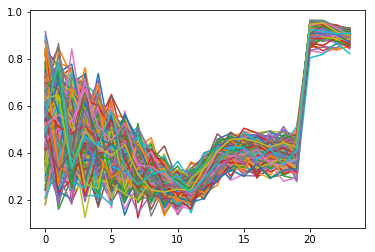

In [13]:
data = np.array(convergence.values())
plot(data);

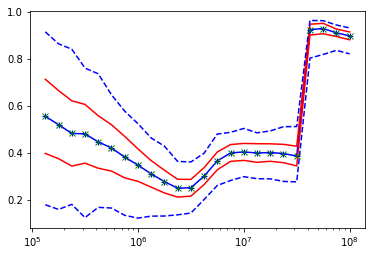

In [24]:
mu = data.mean(axis=1)
sigma = data.std(axis=1)
plot(convergence.keys(), mu, 'b+-')
plot(convergence.keys(), mu + sigma, 'r-')
plot(convergence.keys(), mu - sigma, 'r-')
plot(convergence.keys(), data.max(axis=1), 'b--')
plot(convergence.keys(), data.min(axis=1), 'b--');

f = './run1990_s1261/convergenceRange_1990.pkl'
convergence, sentenceYearCounter, vocabSize = pkl.load(open(f, 'rb'))
semilogx(convergence.keys(), convergence.values(), 'gx');